# Lesson 1: Why Federated Learning?

Welcome to Lesson 1!

To access the `requirements.txt` and `utils1.py` file for this course, go to `File` and click `Open`.

#### 1. Import utils

In [2]:
from utils1 import *

#### 2. Import the MNIST dataset

* Load the MNIST dataset using the `datasets.MNIST` function.

In [4]:
from torchvision import datasets, transforms
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

* Split the training dataset to three datasets for this example.

In [5]:
total_length = len(trainset)
split_size = total_length // 3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

* Set the three different datasets, excluding some digits as shown in the explanation.
    - `part1` excludes digits 1, 3, and 7.
    - `part2` excludes digits 2, 5, and 8.
    - `part3` excludes digits 4, 6, and 9.

This simulates the different datasets that might be available in real world (datasets with missing data, extra data, etc).

In [6]:
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

> Note: The function ```exclude_digits``` has been provided for your use. You can find it in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

* Plot the three datasets.

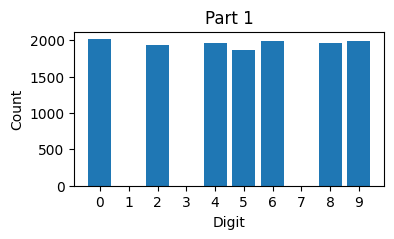

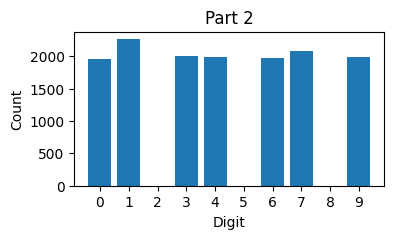

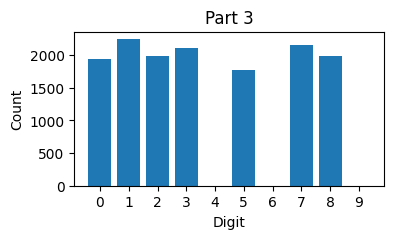

In [7]:
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

#### 3. Train and test the models

* Define three and run the models.

Three instances of the `SimpleModel` class (`model1`, `model2`, `model3`) are created for training.
Find the `SimpleModel` class in the `utils1.py` file.

In [8]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.506538202388342
Epoch 2: Loss = 0.24500493833491968
Epoch 3: Loss = 0.19132229593950648
Epoch 4: Loss = 0.1580840203477893
Epoch 5: Loss = 0.13171681633522345
Epoch 6: Loss = 0.11005786785985841
Epoch 7: Loss = 0.09560647675291051
Epoch 8: Loss = 0.08431707301372013
Epoch 9: Loss = 0.07089465173437845
Epoch 10: Loss = 0.061208421996859615
Training complete
Epoch 1: Loss = 0.3983497648566429
Epoch 2: Loss = 0.1823559520001124
Epoch 3: Loss = 0.16427662226072112
Epoch 4: Loss = 0.13469188967220752
Epoch 5: Loss = 0.12096211240194472
Epoch 6: Loss = 0.09922833855463457
Epoch 7: Loss = 0.09154477613628842
Epoch 8: Loss = 0.08096778536543882
Epoch 9: Loss = 0.0725140313110647
Epoch 10: Loss = 0.06491988796083856
Training complete
Epoch 1: Loss = 0.5017053642654205
Epoch 2: Loss = 0.2649856449717337
Epoch 3: Loss = 0.20764480907100816
Epoch 4: Loss = 0.16497205793521963
Epoch 5: Loss = 0.13931976716025724
Epoch 6: Loss = 0.12069520004395698
Epoch 7: Loss = 0.101212143293909

#### 4. Evaluate the models

* Load the test dataset.

In [9]:
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

* Dataset preparation:
   - `testset_137` includes digits 1, 3, and 7.
   - `testset_258` includes digits 2, 5, and 8.
   - `testset_469` includes digits 4, 6, and 9.

In [10]:
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

> Note: The function ```include_digits``` has been provided for your use. You can find it in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

* Evaluate the models with the test datasets.

The `evaluate_model` function is called to evaluate each model defined above (`model1`, `model2`, `model3`) on both, the entire test dataset and specific subsets of the test dataset.

In [11]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6569, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6872, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6842, Test Accuracy on [4,6,9]: 0.0000


* Analyze the results looking at the 'confusion matrix' for the three models just trained using the ```compute_confusion_matrix```. You can find this function in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

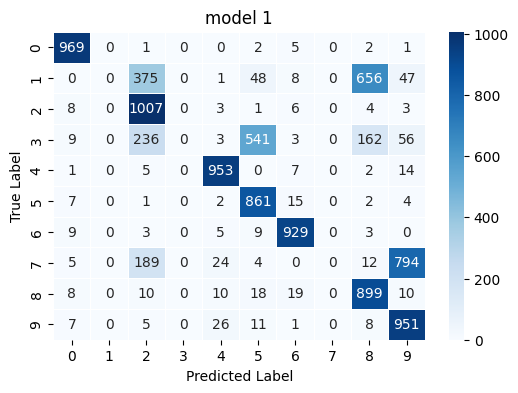

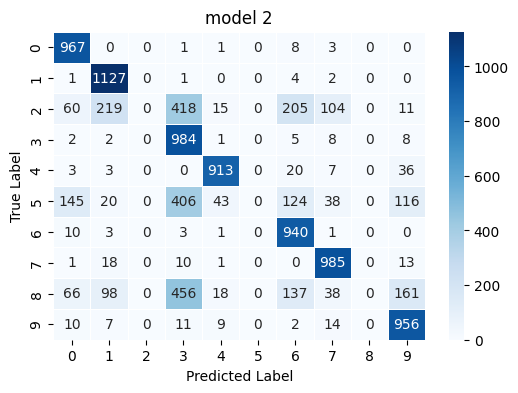

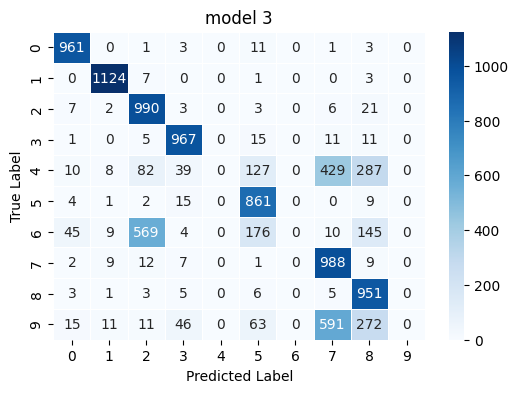

In [12]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")